# Machine Learning Assignment 2
## Naive Bayes and KNN

##**Rahul V S CSE B 3122235001104**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
rcParams['font.family']='Liberation Sans'
rcParams['font.weight']='bold'
rcParams['font.size']=15
rcParams['axes.labelweight']='bold'
rcParams['axes.titleweight']='bold'
rcParams['xtick.labelsize']=15
rcParams['ytick.labelsize']=15

# **Data Importing and Preprocessing**

In [5]:
df=pd.read_csv('spambase_csv_Kaggle.csv')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [8]:
df=df.drop_duplicates()
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# **Class Distribution**

**Histogram :**

(array([2531.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 1679.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

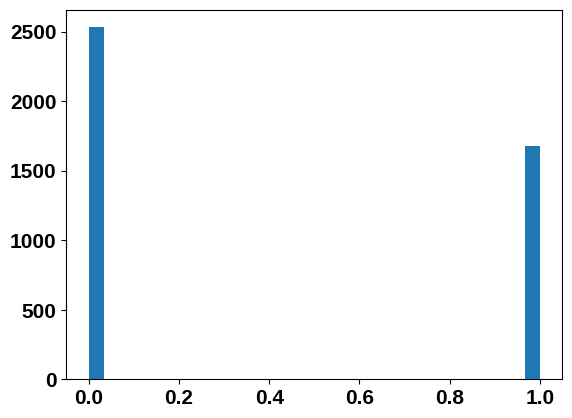

In [9]:
plt.hist(df["class"],bins=30)

**CountPlot :**

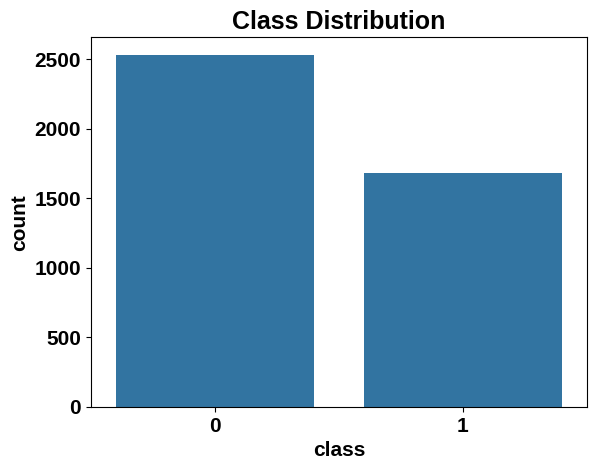

In [10]:
sns.countplot(x=df.iloc[:,-1])
plt.title('Class Distribution')
plt.show()

# **Feature Distribution (EDA Subplots)**

**Histogram**

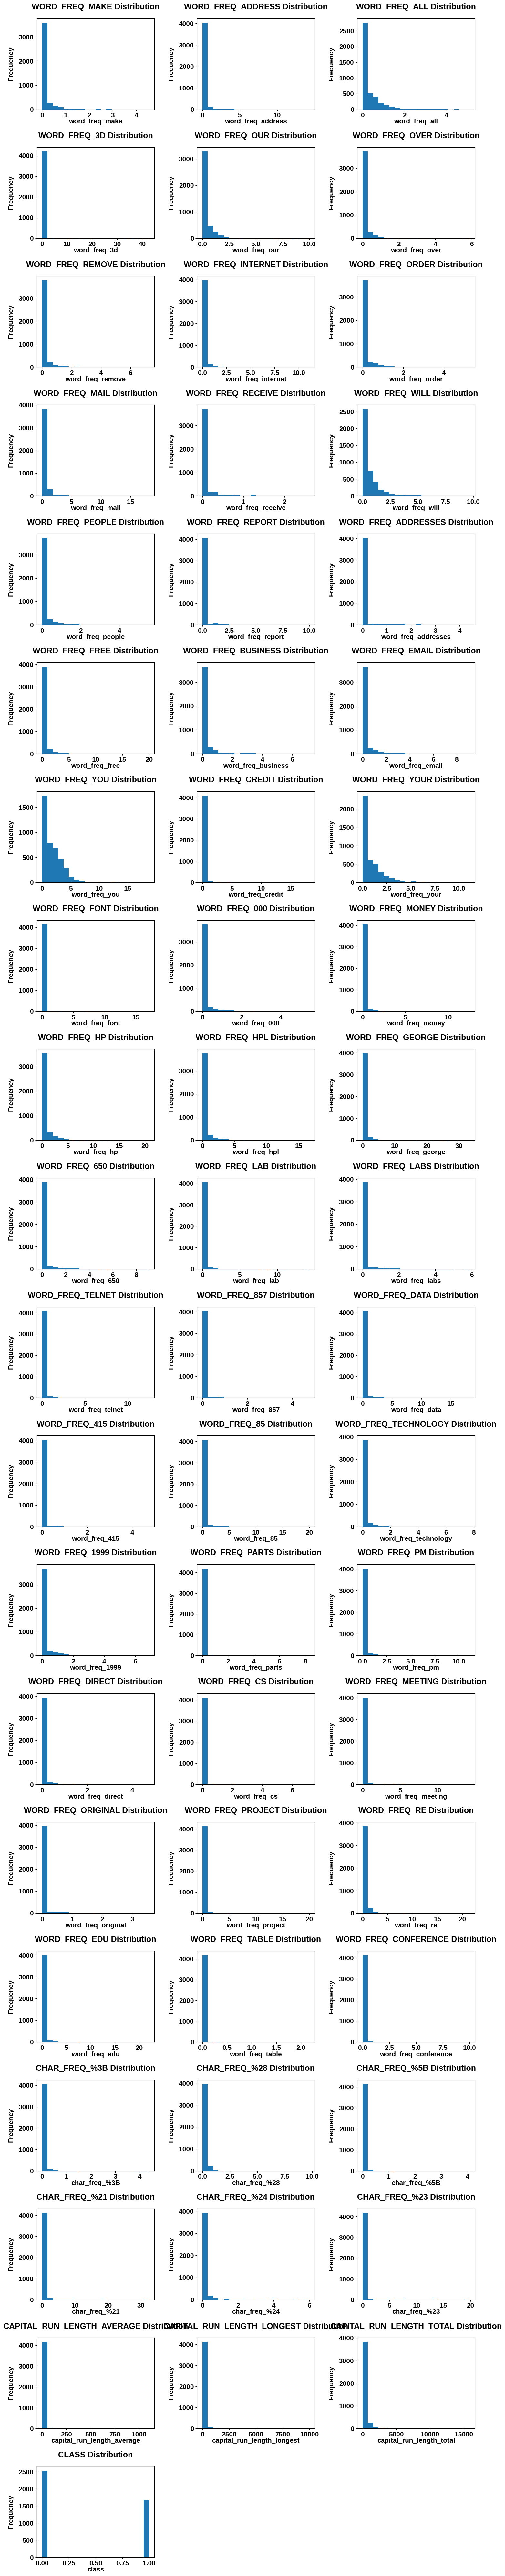

In [11]:
bxwidth=1
rows=math.ceil(len(df.columns)/3)
fig,axes=plt.subplots(rows,3,figsize=(15,4*rows))
axes=axes.flatten()
columns=df.columns
for i,(ax,col) in enumerate(zip(axes,columns)):
  ax.hist(df[col],bins=20)
  ax.set_title(f"{col.upper()} Distribution",pad=20)
  ax.set_xlabel(col,labelpad=0)
  ax.set_ylabel("Frequency",labelpad=10)
for spine in ax.spines.values():
  spine.set_linewidth(bxwidth)
for j in range(i+1,len(axes)):
  fig.delaxes(axes[j])
plt.subplots_adjust(hspace=1.5,wspace=1.3)
plt.tight_layout()
plt.show()

**ScatterPlot**

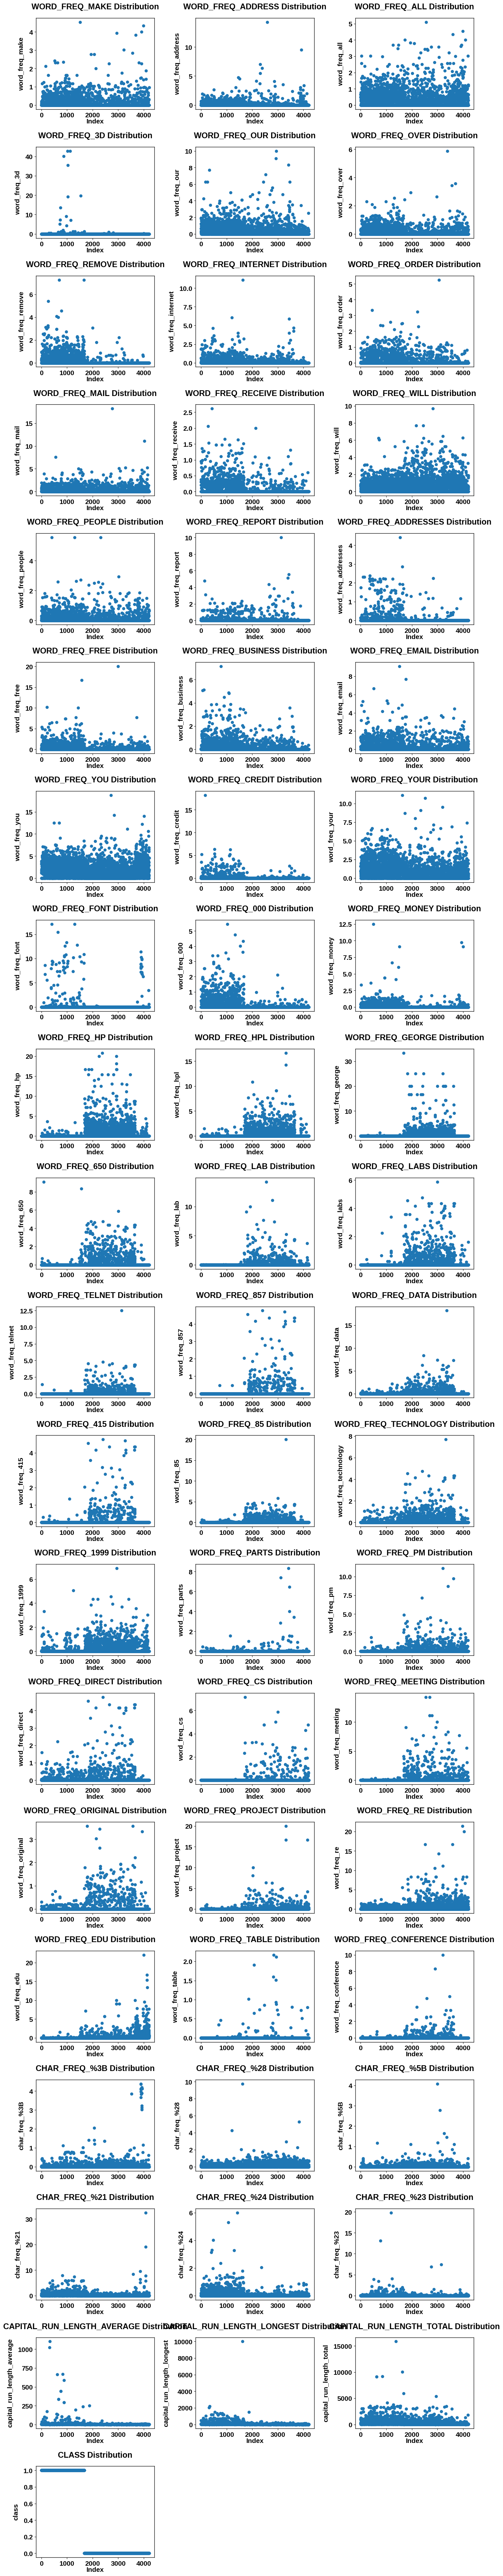

In [12]:
bxwidth=1
rows=math.ceil(len(df.columns)/2)
fig,axes=plt.subplots(rows,3,figsize=(15,4*rows))
axes=axes.flatten()
columns=df.columns
for i,(ax,col) in enumerate(zip(axes,columns)):
    ax.scatter(range(len(df)),df[col])
    ax.set_title(f"{col.upper()} Distribution",pad=20)
    ax.set_xlabel("Index",labelpad=0)
    ax.set_ylabel(col,labelpad=10)
    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)
for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])
plt.subplots_adjust(hspace=1.5,wspace=1.3)
plt.tight_layout()
plt.show()

**Train-Test Split**

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [14]:
print(X_train,X_test,y_train,y_test)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
478             0.00                0.0           0.00           0.0   
1108            0.00                0.0           0.48           0.0   
1940            0.00                0.0           0.00           0.0   
3875            0.00                0.0           0.00           0.0   
2199            0.00                0.0           0.00           0.0   
...              ...                ...            ...           ...   
2426            0.00                0.0           0.00           0.0   
1999            0.00                0.0           0.00           0.0   
2126            0.00                0.0           0.00           0.0   
3014            0.41                0.0           0.00           0.0   
3507            0.09                0.0           0.00           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
478            0.00            0.05              0.00     

**Scaling Data**

In [15]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
print(X_train,X_test,y_train,y_test)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
478             0.00                0.0           0.00           0.0   
1108            0.00                0.0           0.48           0.0   
1940            0.00                0.0           0.00           0.0   
3875            0.00                0.0           0.00           0.0   
2199            0.00                0.0           0.00           0.0   
...              ...                ...            ...           ...   
2426            0.00                0.0           0.00           0.0   
1999            0.00                0.0           0.00           0.0   
2126            0.00                0.0           0.00           0.0   
3014            0.41                0.0           0.00           0.0   
3507            0.09                0.0           0.00           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
478            0.00            0.05              0.00     

# **Naive Bayes**

## **GaussianNB**

In [17]:
start=time.time()
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
ttgnb=time.time()-start
y_pred=gnb.predict(X_test_scaled)

In [18]:
print("The training time for Gaussian Naive Bayes is: ",ttgnb)

The training time for Gaussian Naive Bayes is:  0.018770694732666016


In [19]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score,
roc_curve, average_precision_score)

**Accuracy**

In [20]:
accuracy_score(y_test,y_pred)

0.828978622327791

**Precision**

In [21]:
precision_score(y_test,y_pred)

0.7142857142857143

**Recall**

In [22]:
recall_score(y_test,y_pred)

0.9523809523809523

**F1 Score**

In [23]:
f1_score(y_test,y_pred)

0.8163265306122449

In [24]:
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))

Confusion matrix is 
 [[378 128]
 [ 16 320]]


In [25]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.96      0.75      0.84       506
           1       0.71      0.95      0.82       336

    accuracy                           0.83       842
   macro avg       0.84      0.85      0.83       842
weighted avg       0.86      0.83      0.83       842



## **MultinomialNB**

In [26]:
start=time.time()
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
ttmnb=time.time()-start
y_pred=mnb.predict(X_test)

In [27]:
print("The training time for Multinomial Naive Bayes is: ",ttmnb)

The training time for Multinomial Naive Bayes is:  0.01752448081970215


**Accuracy**

In [28]:
accuracy_score(y_test,y_pred)

0.7885985748218527

**Precision**

In [29]:
precision_score(y_test,y_pred)

0.7615894039735099

**Recall**

In [30]:
recall_score(y_test,y_pred)

0.6845238095238095

**F1 Score**

In [31]:
f1_score(y_test,y_pred)

0.7210031347962382

In [32]:
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))

Confusion matrix is 
 [[434  72]
 [106 230]]


In [33]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.80      0.86      0.83       506
           1       0.76      0.68      0.72       336

    accuracy                           0.79       842
   macro avg       0.78      0.77      0.78       842
weighted avg       0.79      0.79      0.79       842



## **BernoulliNB**

In [34]:
start=time.time()
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
ttbnb=time.time()-start
y_pred=bnb.predict(X_test)

In [35]:
print("The training time for Bernoulli Naive Bayes is: ",ttbnb)

The training time for Bernoulli Naive Bayes is:  0.013231754302978516


**Accuracy**

In [36]:
accuracy_score(y_test,y_pred)

0.8942992874109263

**Precision**

In [37]:
precision_score(y_test,y_pred)

0.8776758409785933

**Recall**

In [38]:
recall_score(y_test,y_pred)

0.8541666666666666

**F1 Score**

In [39]:
f1_score(y_test,y_pred)

0.8657616892911011

In [40]:
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))

Confusion matrix is 
 [[466  40]
 [ 49 287]]


In [41]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.90      0.92      0.91       506
           1       0.88      0.85      0.87       336

    accuracy                           0.89       842
   macro avg       0.89      0.89      0.89       842
weighted avg       0.89      0.89      0.89       842



## **ROC Curve for NaiveBayes**

In [42]:
y_prob_gnb=gnb.predict_proba(X_test_scaled)[:,1]
y_prob_mnb=mnb.predict_proba(X_test)[:,1]
y_prob_bnb=bnb.predict_proba(X_test)[:,1]

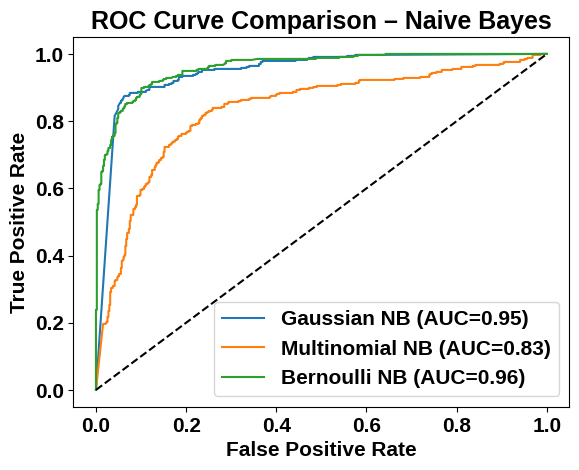

In [43]:
fpr_gnb,tpr_gnb,_=roc_curve(y_test,y_prob_gnb)
fpr_mnb,tpr_mnb,_=roc_curve(y_test,y_prob_mnb)
fpr_bnb,tpr_bnb,_=roc_curve(y_test,y_prob_bnb)
auc_gnb=auc(fpr_gnb,tpr_gnb)
auc_mnb=auc(fpr_mnb,tpr_mnb)
auc_bnb=auc(fpr_bnb,tpr_bnb)
plt.plot(fpr_gnb,tpr_gnb,label=f'Gaussian NB (AUC={auc_gnb:.2f})')
plt.plot(fpr_mnb,tpr_mnb,label=f'Multinomial NB (AUC={auc_mnb:.2f})')
plt.plot(fpr_bnb,tpr_bnb,label=f'Bernoulli NB (AUC={auc_bnb:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Naive Bayes")
plt.legend()
plt.show()

# **KNN**

**Basic Model**

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

**Accuracy vs kplot**

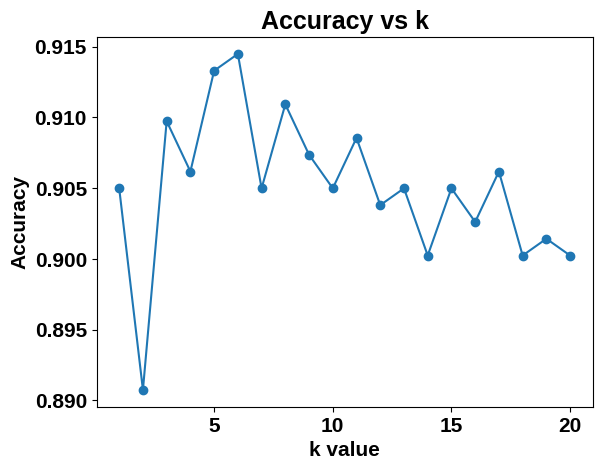

In [45]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  accuracies.append(knn.score(X_test_scaled, y_test))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

## **Stratified K-Fold**

In [46]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores_base=cross_val_score(
    knn,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)
print("Base KNN CV Accuracy:",cv_scores_base.mean())


Base KNN CV Accuracy: 0.8797580257582638


## **Grid Search**

In [47]:
param_grid={
    'n_neighbors':list(range(1,31,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
grid=GridSearchCV(
    knn,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled,y_train)
print("Grid Best Params:",grid.best_params_)
print("Grid Best CV Accuracy:",grid.best_score_)

Grid Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Grid Best CV Accuracy: 0.9180523895397286


## **Randomized Search**

In [48]:
from scipy.stats import randint
param_dist={
    'n_neighbors':randint(1,30),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
rand=RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=15,
    cv=skf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rand.fit(X_train_scaled,y_train)
print("Random Best Params:",rand.best_params_)
print("Random Best CV Accuracy:",rand.best_score_)

Random Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Random Best CV Accuracy: 0.9127111432489274


**Final KNN Model**

In [49]:
best_params=grid.best_params_
knn_final=KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)
knn_final.fit(X_train_scaled,y_train)
y_pred_final=knn_final.predict(X_test_scaled)

**Metrics**

In [50]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
def compute_metrics(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp=cm.ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    specificity=tn/(tn+fp)
    fpr=fp/(fp+tn)
    return accuracy,precision,recall,f1,specificity,fpr,cm

In [51]:
start=time.time()
knn_final.fit(X_train_scaled,y_train)
train_time=time.time()-start

start=time.time()
y_pred_knn=knn_final.predict(X_test_scaled)
pred_time=time.time()-start
acc,prec,rec,f1,spec,fpr,cm=compute_metrics(y_test,y_pred_knn)
print("Final KNN Metrics")
print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1 Score:",f1)
print("Specificity:",spec)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)


Final KNN Metrics
Accuracy: 0.9275534441805225
Precision: 0.9537953795379538
Recall: 0.8601190476190477
F1 Score: 0.9045383411580595
Specificity: 0.9723320158102767
False Positive Rate: 0.02766798418972332
Training Time: 0.00619959831237793
Prediction Time: 0.29004645347595215


**Confusion Matrix – Final KNN**

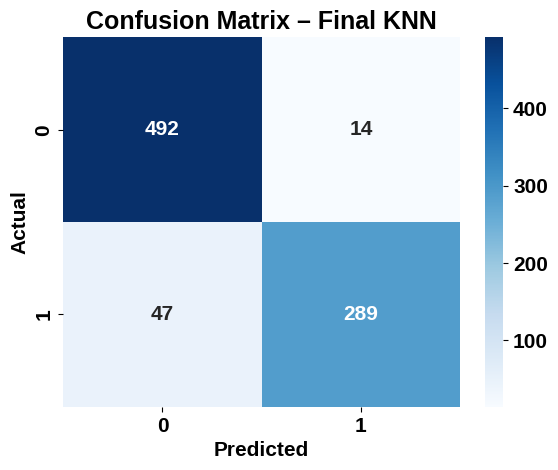

In [52]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix – Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve for KNN**

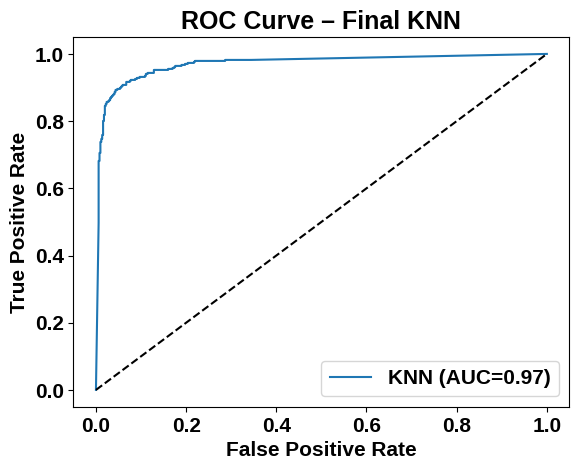

In [53]:
y_prob_knn=knn_final.predict_proba(X_test_scaled)[:,1]
fpr_knn,tpr_knn,_=roc_curve(y_test,y_prob_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn,tpr_knn,label=f'KNN (AUC={auc_knn:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final KNN")
plt.legend()
plt.show()

In [54]:
best_params=grid.best_params_
optimal_k=best_params['n_neighbors']

# **KDTree**

In [55]:
start=time.time()
knn_kd=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='kd_tree'
)
knn_kd.fit(X_train_scaled,y_train)
train_time_kd=time.time()-start
start=time.time()
y_pred_kd=knn_kd.predict(X_test_scaled)
pred_time_kd=time.time()-start

**Metrics**

In [56]:
acc_kd,prec_kd,rec_kd,f1_kd,sp,fpr,cm=compute_metrics(y_test,y_pred_kd)
print("Final KDtree Metrics")
print("Accuracy:",acc_kd)
print("Precision:",prec_kd)
print("Recall:",rec_kd)
print("F1 Score:",f1_kd)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final KDtree Metrics
Accuracy: 0.9275534441805225
Precision: 0.9537953795379538
Recall: 0.8601190476190477
F1 Score: 0.9045383411580595
Specificity: 0.9723320158102767
False Positive Rate: 0.02766798418972332
Training Time: 0.00619959831237793
Prediction Time: 0.29004645347595215


# **BallTree**

In [57]:
start=time.time()
knn_bt=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='ball_tree'
)
knn_bt.fit(X_train_scaled,y_train)
train_time_bt=time.time()-start
start=time.time()
y_pred_bt=knn_bt.predict(X_test_scaled)
pred_time_bt=time.time()-start

**Metrics**

In [58]:
acc_bt,prec_bt,rec_bt,f1_bt,sp,fpr,cm=compute_metrics(y_test,y_pred_bt)
print("Final Balltree Metrics")
print("Accuracy:",acc_bt)
print("Precision:",prec_bt)
print("Recall:",rec_bt)
print("F1 Score:",f1_bt)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final Balltree Metrics
Accuracy: 0.9275534441805225
Precision: 0.9537953795379538
Recall: 0.8601190476190477
F1 Score: 0.9045383411580595
Specificity: 0.9723320158102767
False Positive Rate: 0.02766798418972332
Training Time: 0.00619959831237793
Prediction Time: 0.29004645347595215


## **Training vs Validation**

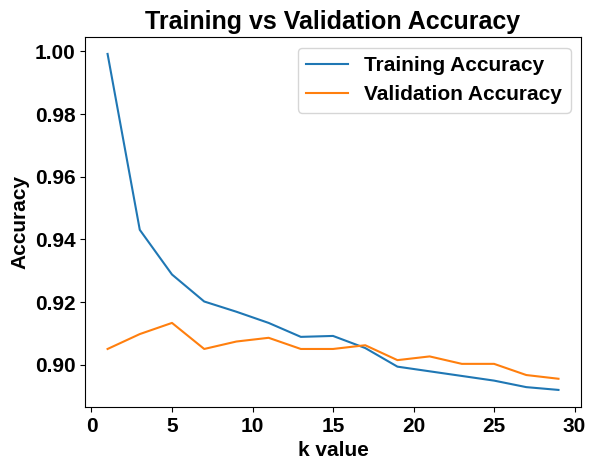

In [59]:
train_acc=[]
val_acc=[]
k_values=range(1,31,2)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_acc.append(knn.score(X_train_scaled,y_train))
    val_acc.append(knn.score(X_test_scaled,y_test))
plt.plot(k_values,train_acc,label='Training Accuracy')
plt.plot(k_values,val_acc,label='Validation Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

## Cross Validation Scores

In [60]:
gnb_scores=cross_val_score(
    GaussianNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [63]:
mnb_scores=cross_val_score(
    MultinomialNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [65]:
bnb_scores=cross_val_score(
    BernoulliNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)


In [66]:
knn_kd_scores=cross_val_score(
    knn_kd,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [67]:
knn_bt_scores=cross_val_score(
    knn_bt,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

# **One way ANOVA Test**

In [69]:
from scipy.stats import f_oneway
F_stat,p_value=f_oneway(
    gnb_scores,
    mnb_scores,
    bnb_scores,
    knn_kd_scores,
    knn_bt_scores
)

print("F-statistic:",F_stat)
print("p-value:",p_value)

F-statistic: 46.56269381217908
p-value: 7.373238327781757e-10


### Mean Accuracy to find the best model

In [70]:
print("Gaussian NB Mean Accuracy:",gnb_scores.mean())
print("Multinomial NB Mean Accuracy:",mnb_scores.mean())
print("Bernoulli NB Mean Accuracy:",bnb_scores.mean())
print("KNN KDTree Mean Accuracy:",knn_kd_scores.mean())
print("KNN BallTree Mean Accuracy:",knn_bt_scores.mean())

Gaussian NB Mean Accuracy: 0.8280902641522744
Multinomial NB Mean Accuracy: 0.8013738916495077
Bernoulli NB Mean Accuracy: 0.8862901839057147
KNN KDTree Mean Accuracy: 0.9180523895397286
KNN BallTree Mean Accuracy: 0.9180523895397286


In [71]:
best_model=max(
    [
        ("Gaussian NB",gnb_scores.mean()),
        ("Multinomial NB",mnb_scores.mean()),
        ("Bernoulli NB",bnb_scores.mean()),
        ("KNN KDTree",knn_kd_scores.mean()),
        ("KNN BallTree",knn_bt_scores.mean())
    ],
    key=lambda x:x[1]
)

print("Best Model:",best_model)

Best Model: ('KNN KDTree', np.float64(0.9180523895397286))
